In [ ]:
#Importing required Models and libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
#Reading the csv File
data = pd.read_csv('/content/data_arrhythmia.csv',delimiter=";")
data.head()


,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [ ]:
data.drop(["J","R'_wave","S'_wave", "AB", "AC", "AD","AE", "AF", "AG", "AH","AI","AJ","AK","AL","AM", "AN", "AO", "AP", "AR", "AS", "AT","AR","AS","AT","AU","AV","AY","AZ",
            "BC", "BD","BE", "BF", "BG", "BH","BI","BJ","BK","BL","BM", "BN", "BO", "BP", "BR", "BS", "BT","BR","BS","BT","BU","BV","BY","BZ",
           "CA", "CB", "CD","CE", "CG", "CH","CI","CJ","CK","CL","CM", "CN", "CO", "CP", "CR", "CS", "CT","CR","CS","CT","CU","CV","CY","CZ",
           "DA", "DB", "DC","DE", "DF", "DG", "DH","DI","DJ","DK","DL","DM", "DN", "DO", "DP", "DR", "DS", "DT","DR","DS","DT","DU","DV","DY","DZ",
           "EA", "EB", "EC","ED", "EF", "EG", "EH","EI","EJ","EK","EL","EM", "EN", "EO", "EP", "ER", "ES", "ET","ER","ES","ET","EU","EV","EY","EZ",
           "FA", "FB", "FC","FD", "FE", "FG", "FH","FI","FJ","FK","FL","FM", "FN", "FO", "FP", "FR", "FS", "FT","FR","FS","FT","FU","FV","FY","FZ",
           "GA", "GB", "GC","GD", "GE", "GF", "FH","FI","FJ","FK","FL","FM", "FN", "FO", "FP", "FR", "FS", "FT","FR","FS","FT","FU","FV","FY","FZ",
           "HA", "HB", "HC","HD", "HE", "HF", "HG","HI","HJ","HK","HL","HM", "HN", "HO", "HP", "HR", "HS", "HT","HR","HS","HT","HU","HV","HY","HZ",
           "IA", "IB", "IC","ID", "IE", "IF", "IG","IH","IJ","IK","IL","IM", "IN", "IO", "IP", "IR", "IS", "IT","IR","IS","IT","IU","IV","IY","IZ",
           "JA", "JB", "JC","JD", "JE", "JF", "JG","JH","JI","JK","JL","JM", "JN", "JO", "JP", "JR", "JS", "JT","JR","JS","JT","JU","JV","JY","JZ",
           "KA", "KB", "KC","KD", "KE", "KF", "KG","KH","KI","KJ","KL","KM", "KN", "KO", "KP", "KR", "KS", "KT","KR","KS","KT","KU","KV","KY","KZ",
           "LB", "LC", "T", "P", "QRST", "heart_rate"], axis=1, inplace=True)

In [ ]:
data.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,HH,II,JJ,KK,LA,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-10.7,0.8,0.2,-0.4,-0.9,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,-1.5,2.2,0.8,-0.4,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,24.7,4.9,0.5,1.3,-2.4,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,-1.5,5.1,-0.5,0.1,-2.2,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,-7.7,0.0,-0.7,-0.2,-3.6,-0.1,3.9,25.4,62.8,7


In [ ]:
data.shape

(452, 47)

In [ ]:
data.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs', 'q_wave', 'r_wave',
       's_wave', 'AA', 'AB'', 'BB', 'CC', 'Cf', 'DD', 'FF', 'GG', 'GH', 'GI',
       'GJ', 'GK', 'GL', 'GM', 'GN', 'GO', 'GP', 'GR', 'GS', 'GT', 'GU', 'GV',
       'GY', 'GZ', 'HH', 'II', 'JJ', 'KK', 'LA', 'LD', 'LE', 'LF', 'LG',
       'diagnosis'],
      dtype='object')

In [ ]:
data.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,HH,II,JJ,KK,LA,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,2.670796,4.862168,0.001549,-0.285398,-1.457301,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,16.697646,3.520306,0.492221,0.675060,2.002430,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-74.000000,0.000000,-2.300000,-4.800000,-28.600000,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-7.700000,2.200000,-0.300000,-0.600000,-2.100000,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,2.950000,4.400000,0.100000,-0.200000,-1.100000,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,12.225000,6.700000,0.300000,0.000000,0.000000,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,66.700000,19.900000,3.300000,3.400000,0.000000,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:
data.isnull().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
q_wave          0
r_wave          0
s_wave          0
AA              0
AB'             0
BB              0
CC              0
Cf              0
DD              0
FF              0
GG              0
GH              0
GI              0
GJ              0
GK              0
GL              0
GM              0
GN              0
GO              0
GP              0
GR              0
GS              0
GT              0
GU              0
GV              0
GY              0
GZ              0
HH              0
II              0
JJ              0
KK              0
LA              0
LD              0
LE              0
LF              0
LG              0
diagnosis       0
dtype: int64

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           452 non-null    int64  
 1   sex           452 non-null    int64  
 2   height        452 non-null    int64  
 3   weight        452 non-null    int64  
 4   qrs_duration  452 non-null    int64  
 5   p-r_interval  452 non-null    int64  
 6   q-t_interval  452 non-null    int64  
 7   t_interval    452 non-null    int64  
 8   p_interval    452 non-null    int64  
 9   qrs           452 non-null    int64  
 10  q_wave        452 non-null    int64  
 11  r_wave        452 non-null    int64  
 12  s_wave        452 non-null    int64  
 13  AA            452 non-null    int64  
 14  AB'           452 non-null    int64  
 15  BB            452 non-null    int64  
 16  CC            452 non-null    int64  
 17  Cf            452 non-null    int64  
 18  DD            452 non-null    

Finding the co-relation between attributes


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: >

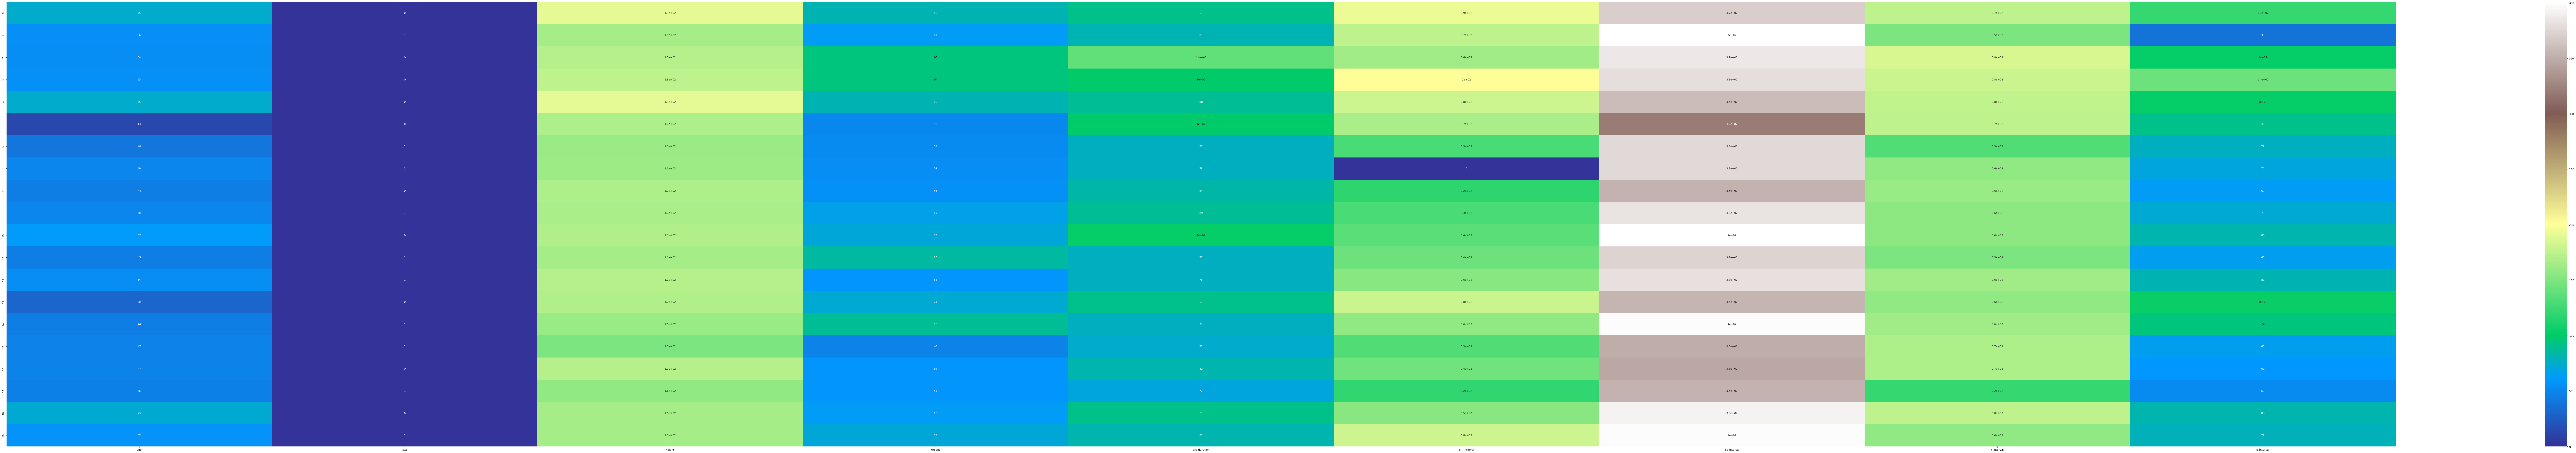

In [ ]:
plt.figure(figsize=(200,30))
sns.heatmap(data[0:20][["age","sex","height","weight","qrs_duration","p-r_interval","q-t_interval","t_interval","p_interval"]], annot=True, cmap='terrain')

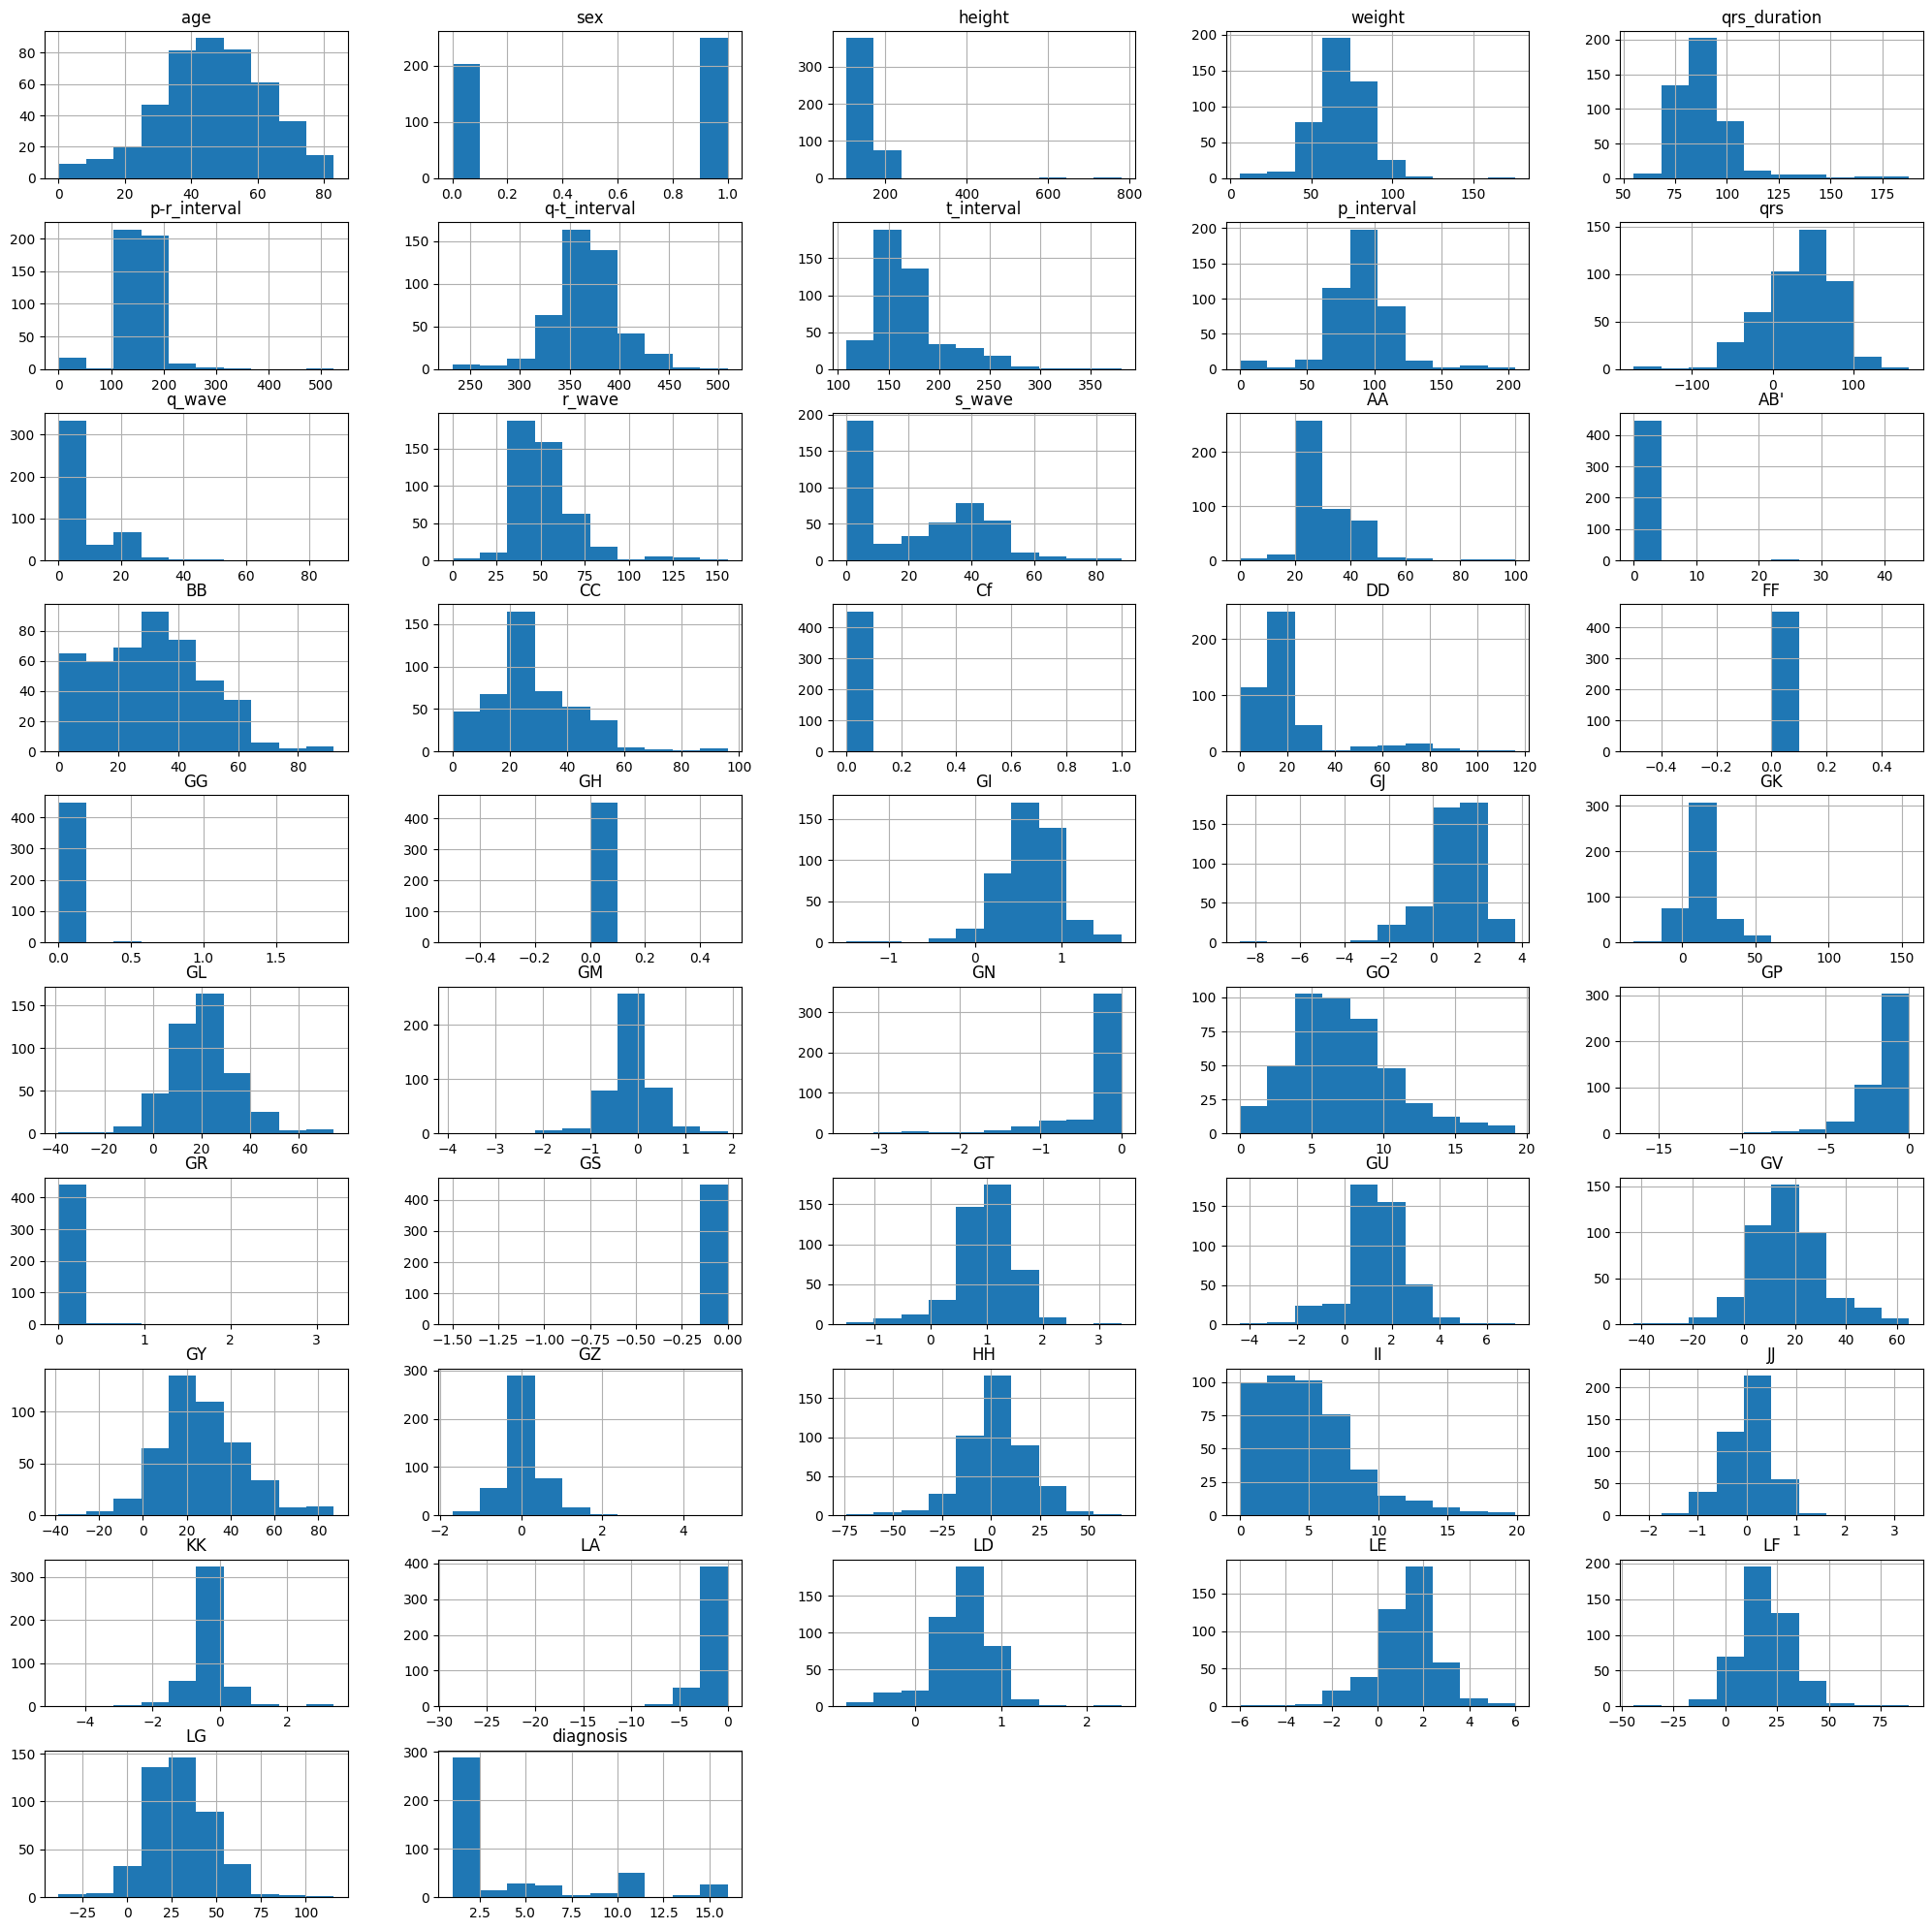

In [ ]:
data.hist(figsize=(25,25), layout=(10,5));

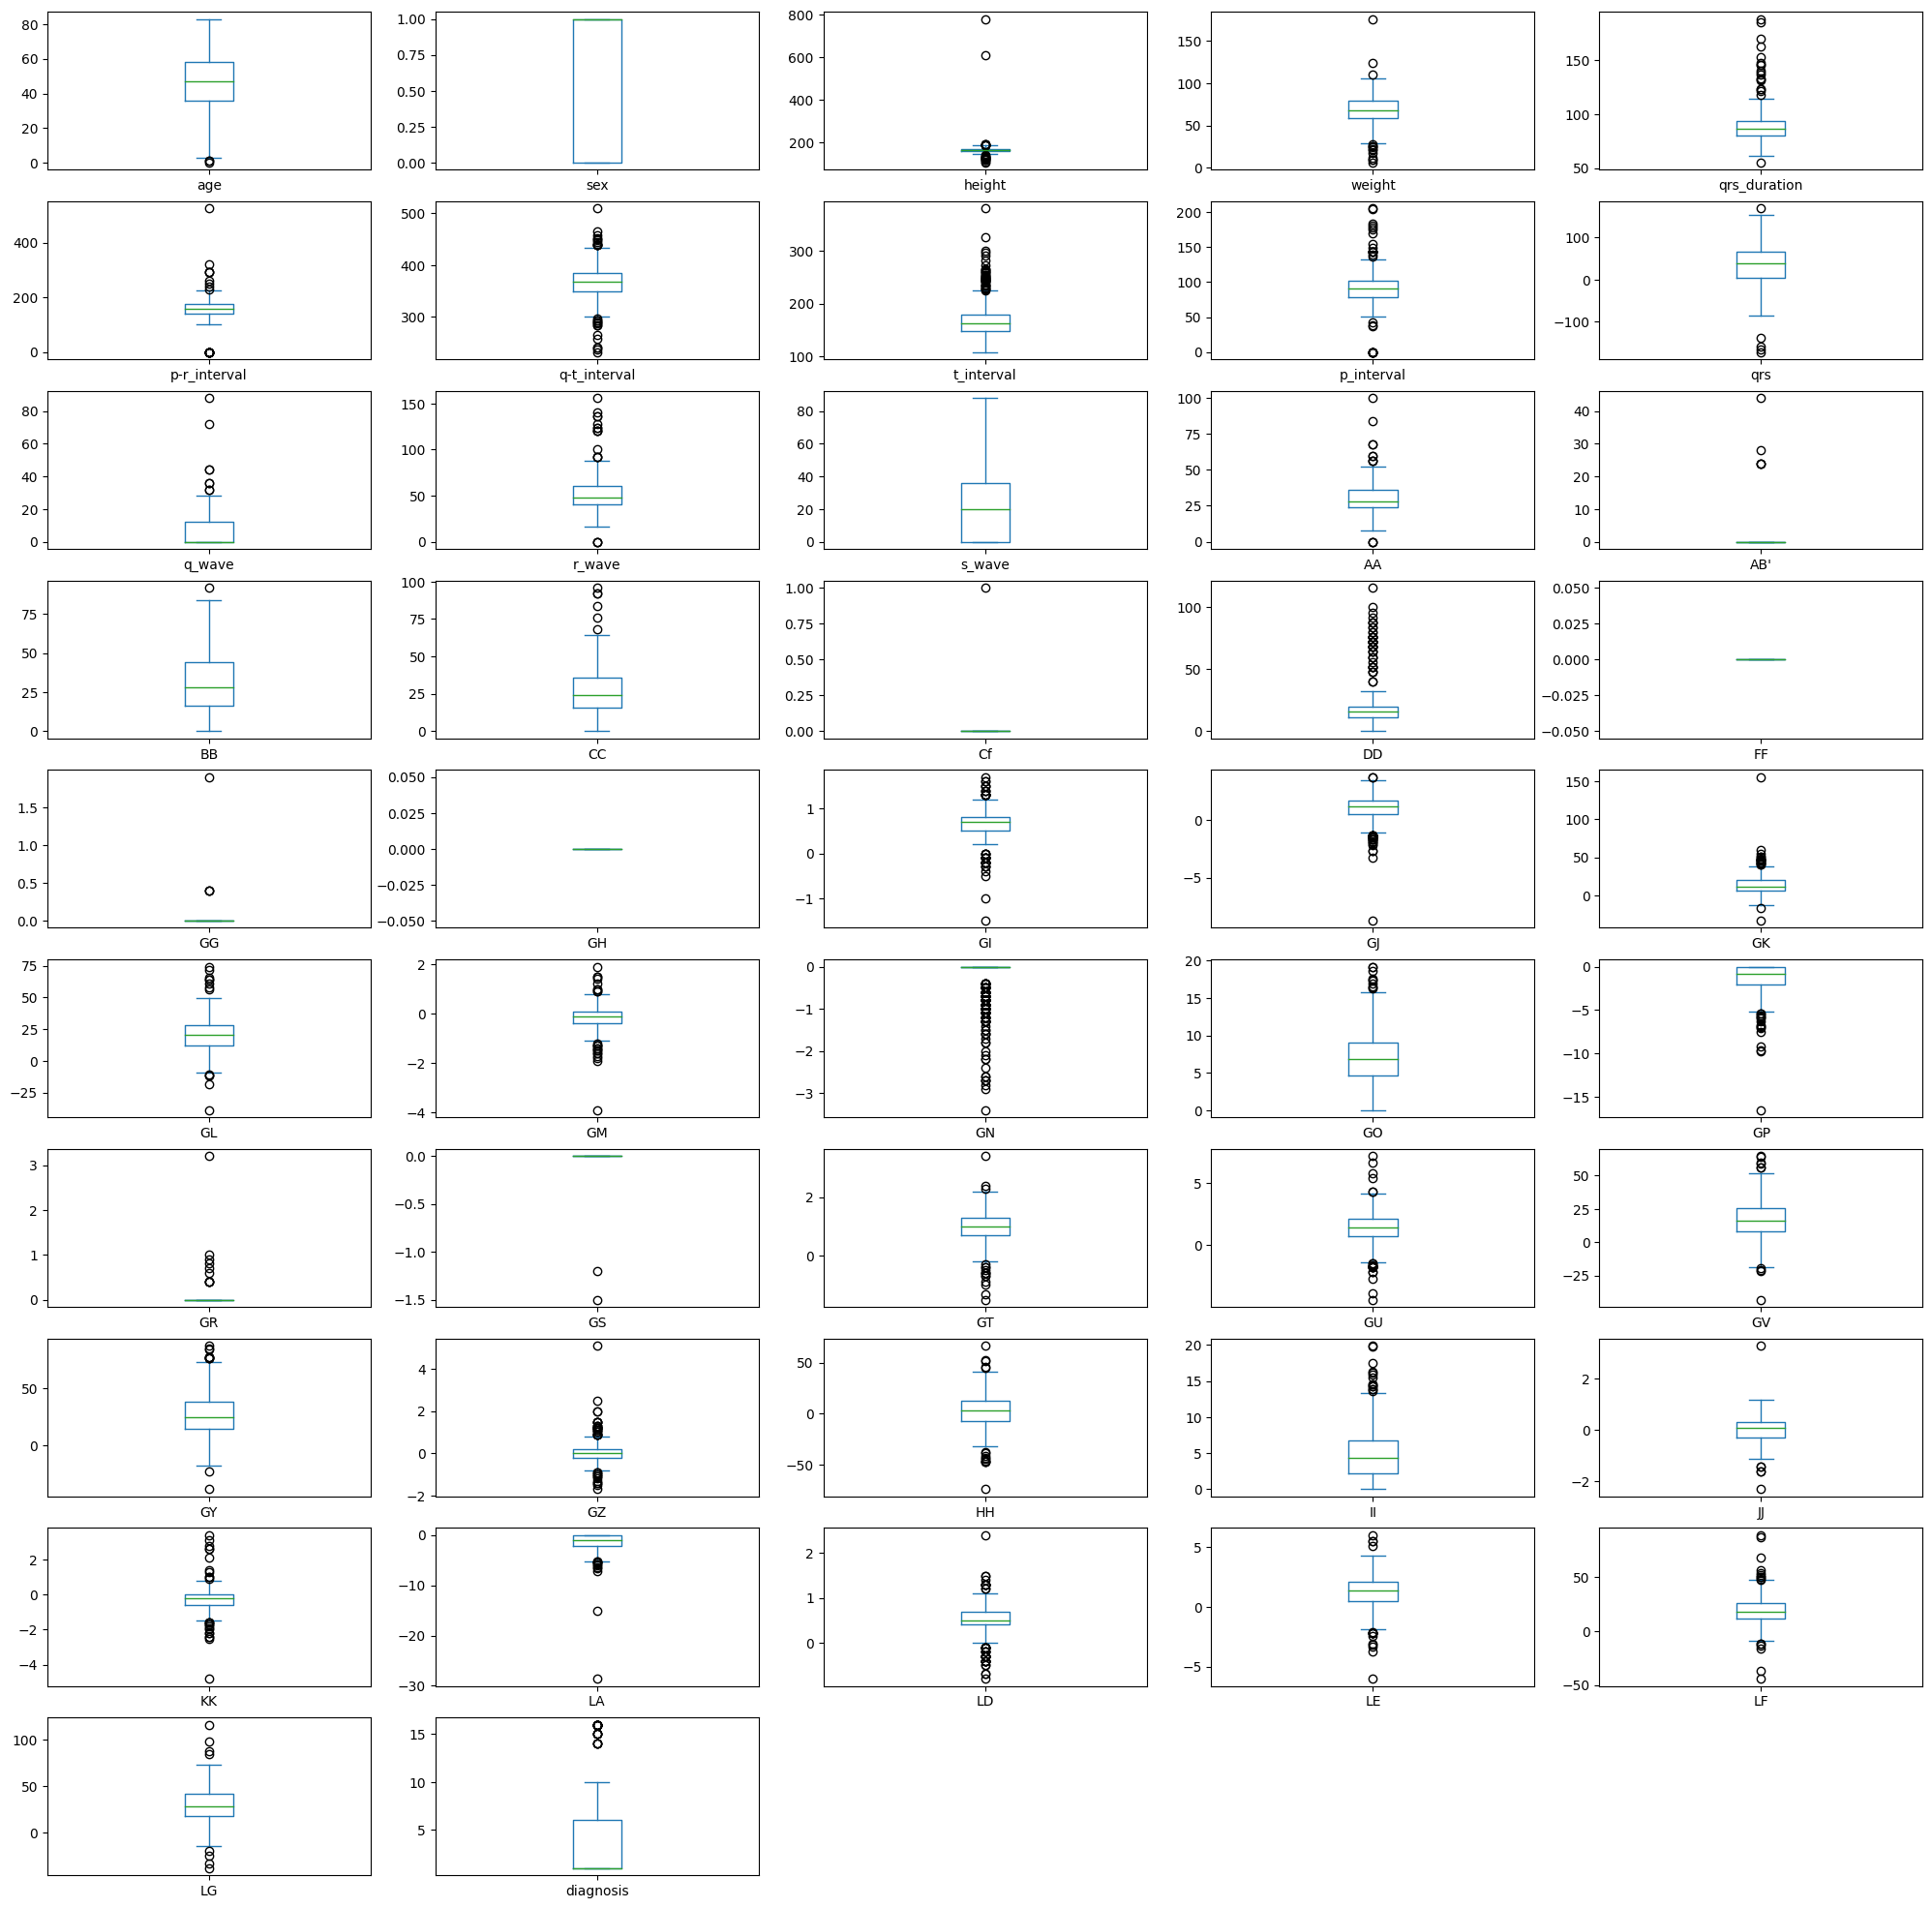

In [ ]:
# box and whiskers plot
data.plot(kind='box', subplots=True, layout=(10,5), figsize=(25,25))
plt.show()

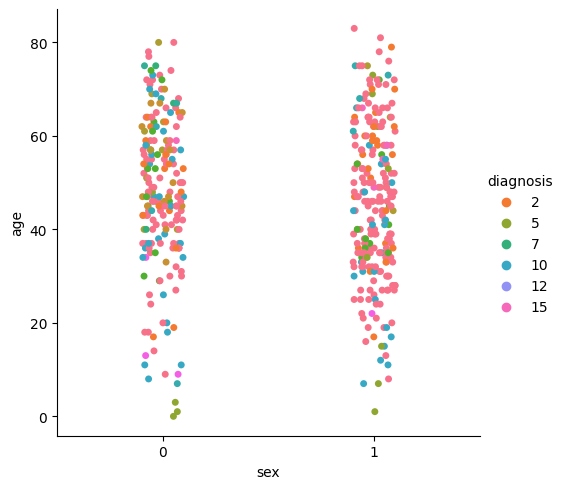

In [ ]:
sns.catplot(data, x='sex', y='age',  hue='diagnosis', palette='husl')

<Axes: xlabel='sex', ylabel='height'>

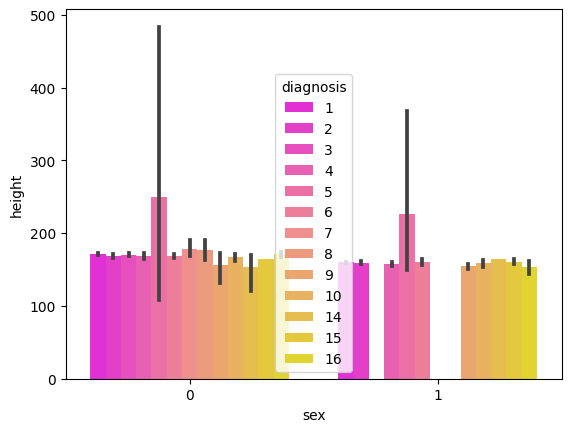

In [ ]:
sns.barplot(data, x='sex', y='height', hue='diagnosis', palette='spring')

In [ ]:
data['sex'].value_counts()

1    249
0    203
Name: sex, dtype: int64

249 Males and 203 Females

In [ ]:
data['diagnosis'].value_counts().sort_index()


1     245
2      44
3      15
4      15
5      13
6      25
7       3
8       2
9       9
10     50
14      4
15      5
16     22
Name: diagnosis, dtype: int64

In [ ]:
data['qrs_duration'].value_counts()

82     20
85     20
90     20
80     20
78     20
       ..
137     1
170     1
163     1
138     1
133     1
Name: qrs_duration, Length: 67, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

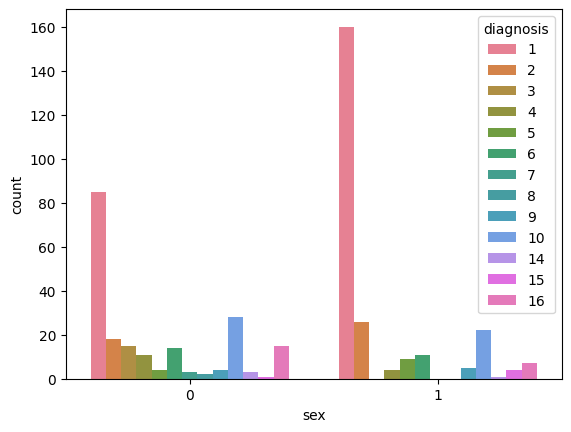

In [ ]:
sns.countplot(x='sex', data=data, palette='husl', hue='diagnosis')

Here 1 means male and 0 means female.

<Axes: xlabel='diagnosis', ylabel='count'>

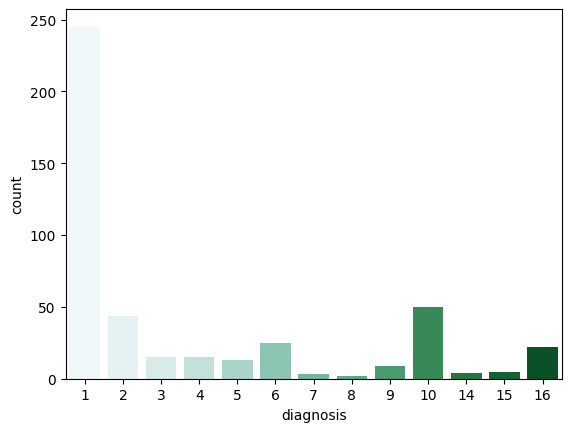

In [ ]:
sns.countplot(x='diagnosis',palette='BuGn', data=data)

In [ ]:
data['height'].value_counts()

160    81
165    46
170    40
155    23
175    21
156    19
163    16
162    15
168    15
172    14
157    10
176    10
164     9
178     9
158     9
166     9
171     9
150     9
167     8
173     7
169     7
159     6
153     5
161     5
177     4
154     4
180     4
174     4
186     3
190     3
185     3
182     2
120     2
130     2
780     1
188     1
138     1
119     1
148     1
127     1
152     1
146     1
181     1
105     1
132     1
608     1
149     1
110     1
124     1
133     1
179     1
184     1
140     1
Name: height, dtype: int64

<Axes: xlabel='weight', ylabel='count'>

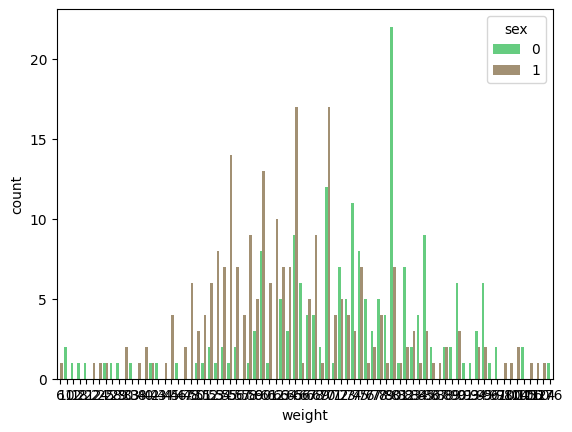

In [ ]:
sns.countplot(x='weight', hue='sex',data=data, palette='terrain')

In [ ]:
data['weight'].value_counts()

80    29
70    29
65    26
60    21
75    15
      ..
6      1
18     1
33     1
96     1
29     1
Name: weight, Length: 76, dtype: int64

<Axes: xlabel='sex', ylabel='age'>

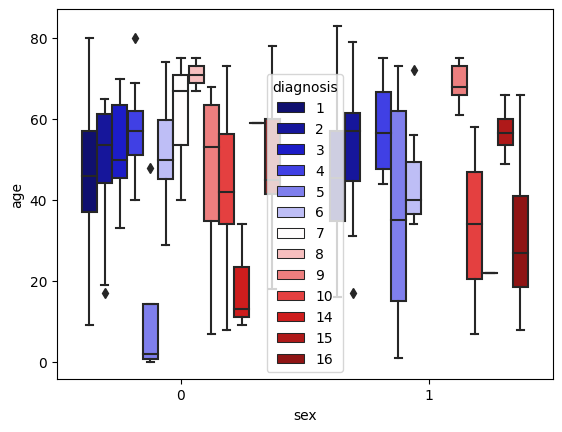

In [ ]:
sns.boxplot(x='sex', y='age', hue='diagnosis', palette='seismic', data=data)

<Axes: xlabel='sex', ylabel='weight'>

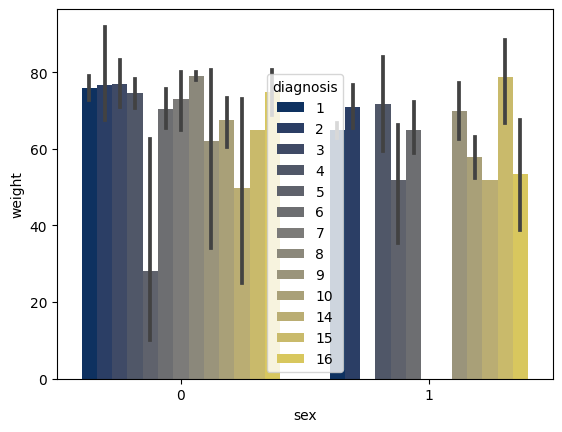

In [ ]:
sns.barplot(x='sex', y='weight', hue='diagnosis',data=data, palette='cividis')

<Axes: xlabel='sex', ylabel='height'>

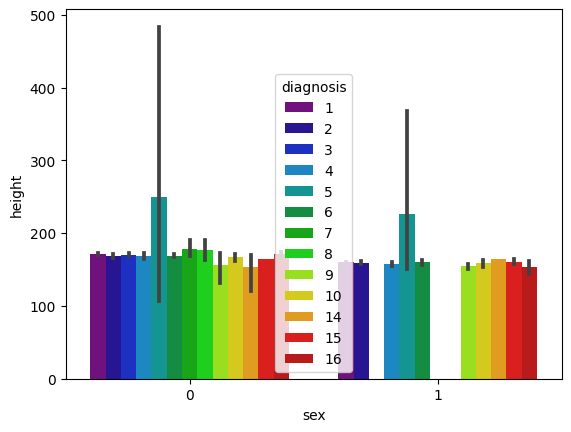

In [ ]:
sns.barplot(x='sex', y='height', data=data, hue='diagnosis', palette='nipy_spectral')

<Axes: xlabel='diagnosis', ylabel='height'>

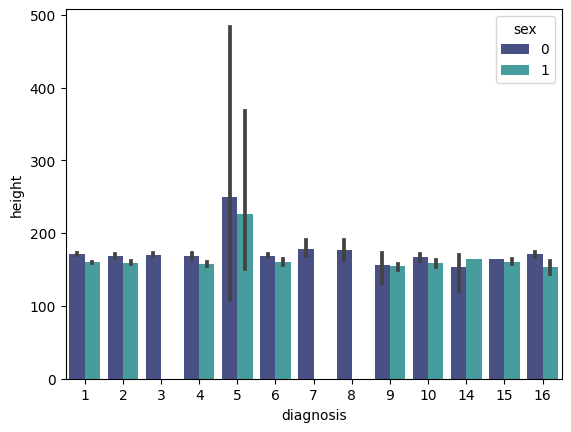

In [ ]:
sns.barplot(x='diagnosis', y='height', hue='sex', data=data, palette='mako')

<Axes: xlabel='sex', ylabel='s_wave'>

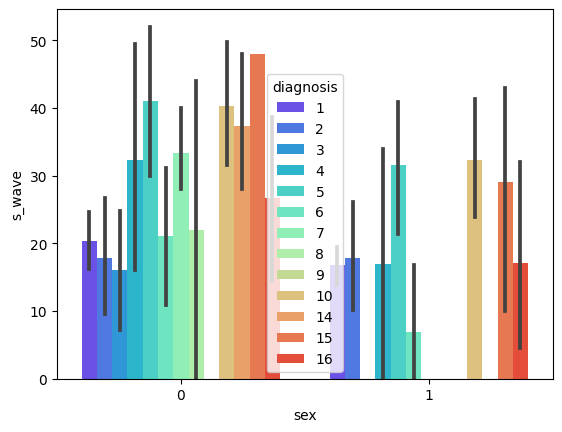

In [ ]:
sns.barplot(x='sex', y='s_wave', hue='diagnosis', palette='rainbow', data=data)


There are 16 classes as follows

1.Normal
2.Ischemic changes (Coronary Artery Disease
3.Old Anterior Myocardial Infarction
4.Old Inferior Myocardial Infarction
5.Sinus tachycardy
6.Sinus bradycardy
7.Ventricular Premature Contraction (PVC)
8.Supraventricular Premature Contraction
9.Left bundle branch block
10.Right bundle branch block
11.degree AtrioVentricular block
12.degree AV block
13.degree AV block
14.Left ventricule hypertrophy
15.Atrial Fibrillation or Flutter
16.Others

However only first one is a normal kind of arrythmia where the other classes can be superclassed as risky arrythmia cases. In this notebook, all cases are classified as either normal or risky. Risky being the positive (True) case and normal being the negative (False) case, diagnosis column is reworked as follows.

In [ ]:
norm_risk_list = []
for diagnose in data.diagnosis:
    if diagnose == 1:
        norm_risk_list.append(True)
    else:
        norm_risk_list.append(False)
data["label"] = np.array(norm_risk_list)
data.drop(columns = ["diagnosis"],inplace = True)
data.label.value_counts()

True     245
False    207
Name: label, dtype: int64

In [ ]:
X = data.drop(columns = [data.columns[-1]])
y = data[data.columns[-1]]
print(X.shape)
print(y.shape)

(452, 46)
(452,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(361, 46)
(361,)
(91, 46)
(91,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled


In [ ]:
model_names = ["Logistic Regression",
               "Decision Tree Classifier",
               "Random Forest Classifier",
              ]

models = []
predictions = []
pred_probabilities = []

Logistic Regression

In [ ]:
log_model = LogisticRegression(random_state=0)
models.append(log_model)
log_model.fit(X_train, y_train)
log_predprob = log_model.predict_proba(X_test)
pred_probabilities.append(log_predprob)
log_pred = log_model.predict(X_test)
predictions.append(log_pred)

Decision Tree Classifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=0,max_depth = 8,max_features="auto")
models.append(tree_model)
tree_model.fit(X_train, y_train)
tree_predprob = tree_model.predict_proba(X_test)
pred_probabilities.append(tree_predprob)
tree_pred = tree_model.predict(X_test)
predictions.append(tree_pred)

Random Forest Classifier

In [ ]:
rndfor_model = RandomForestClassifier(max_depth=9, random_state=0,n_estimators = 100)
models.append(rndfor_model)
rndfor_model.fit(X_train, y_train)
rndfor_predprob = rndfor_model.predict_proba(X_test)
pred_probabilities.append(rndfor_predprob)
rndfor_pred = rndfor_model.predict(X_test)
predictions.append(rndfor_pred)

In [ ]:
for name,pred in zip(model_names,predictions):
    print(name,"Accuracy:",round(accuracy_score(y_test,pred) * 100 , 2),"%")

Logistic Regression Accuracy: 71.43 %
Decision Tree Classifier Accuracy: 58.24 %
Random Forest Classifier Accuracy: 65.93 %


The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes.

In [ ]:
for name,pred in zip(model_names,pred_probabilities):
    print(name,"AUROC:",round(roc_auc_score(y_test,pred[:, 1]) * 100 , 2),"%")


Logistic Regression AUROC: 73.28 %
Decision Tree Classifier AUROC: 61.22 %
Random Forest Classifier AUROC: 76.82 %
